In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
infilepath = r"P:\EW_analysis\analysis\writing\writing_data"
classified_index_df = pd.read_csv(os.path.join(infilepath, 'classification_sunjeev.csv'))
orig_index_df = pd.read_csv(os.path.join(infilepath, 'classify_statements_wi.csv'))

In [4]:
classified_index_df = classified_index_df.dropna()
orig_index_df = orig_index_df.loc[classified_index_df.index]

In [10]:
# checking that the writing was the same.

import difflib as dfl

orig_index_df['similarity'] = dfl.SequenceMatcher(None,orig_index_df['writing'],classified_index_df['writing']).ratio()

Now compare manual classification to LinearSVC/NaiveBayes version.

In [13]:
orig_index_df.Group.value_counts()

EWRE    26
EW      15
Name: Group, dtype: int64

In [15]:
classified_index_df.Group.value_counts()

EWRE    25
EW      16
Name: Group, dtype: int64

In [16]:
classified_index_df['Group_true'] = orig_index_df.Group

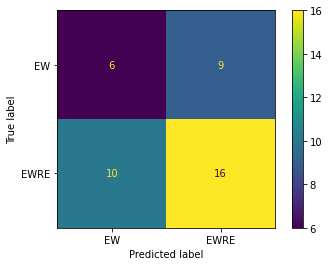

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(classified_index_df.Group_true, classified_index_df.Group, labels = ['EW','EWRE'])

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['EW','EWRE'])
disp.plot()